## APPLIED COMPUTER VISION HOMEWORK 3

### Imports

In [1]:
!pip install pycocotools
!pip install opencv-python
!pip install matplotlib

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


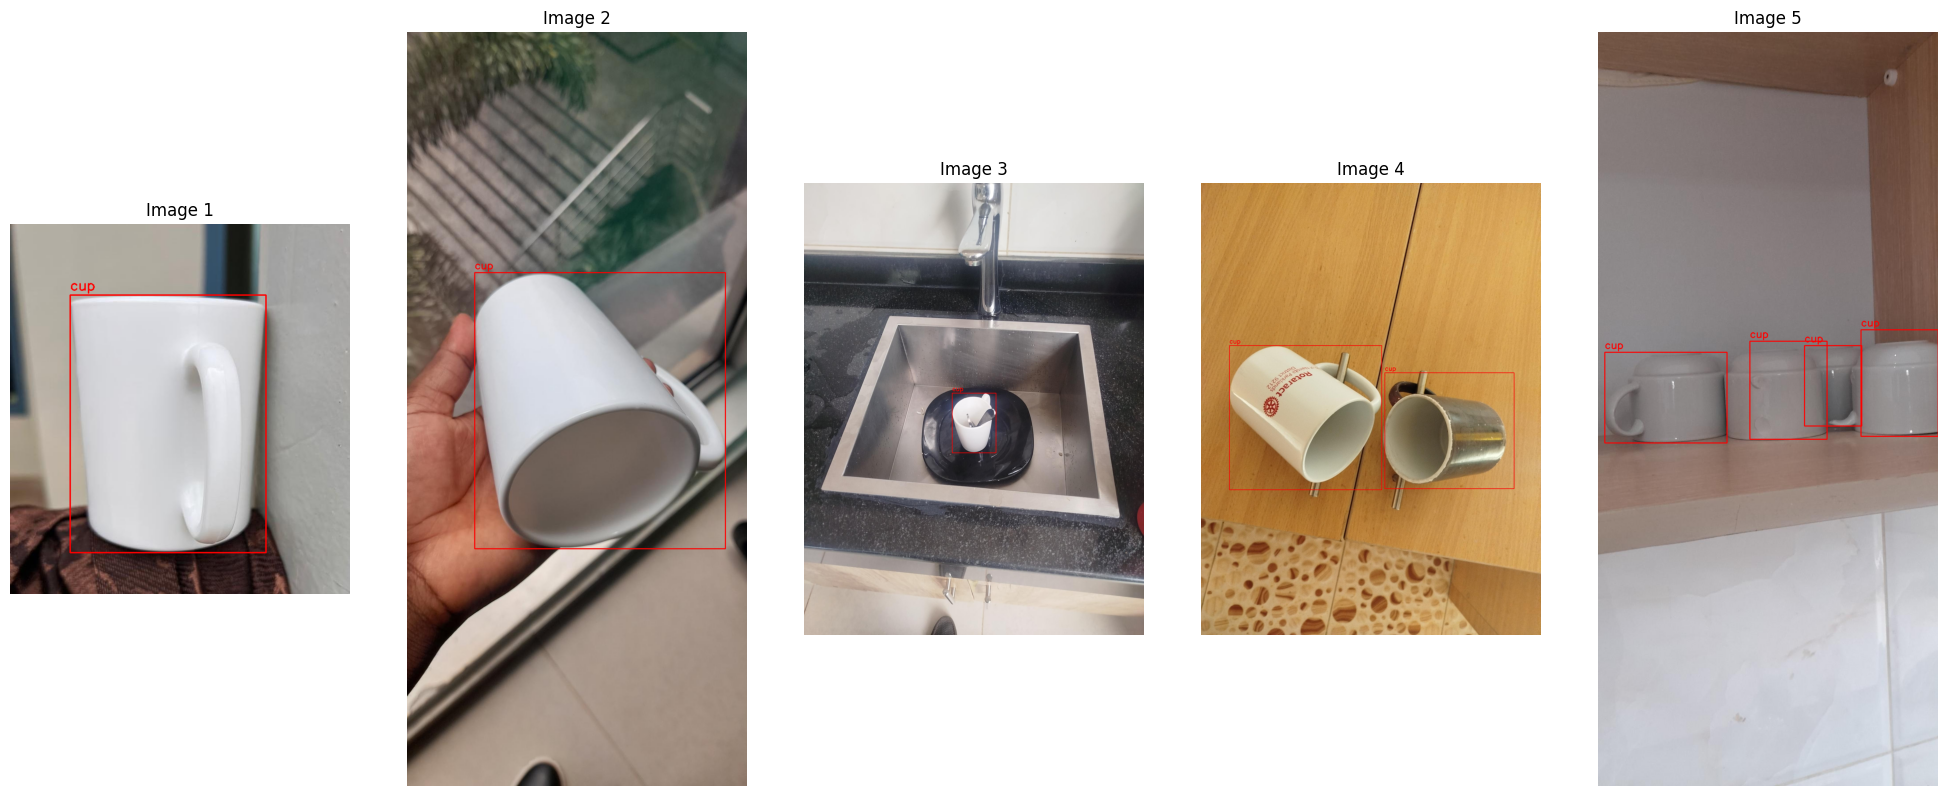

In [6]:
import os
import cv2
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

# Path to your dataset
data_dir = '/kaggle/input/annotated-cups/annotated cups.v2i.coco - split/'
annotations_path = os.path.join(data_dir, 'train/_annotations.coco.json')

# Load COCO annotations
coco = COCO(annotations_path)

# Get image IDs and category IDs
image_ids = coco.getImgIds()
category_ids = coco.getCatIds()

# Create a grid of subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 20))  # 1 row, 5 columns for 5 images
fig.tight_layout()

# Display the first 5 images with annotations
for i, img_id in enumerate(image_ids[:5]):  # Check first 5 images
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(data_dir, 'train/', img_info['file_name'])  # Adjust path as needed
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

    # Load annotations for the image
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)

    # Draw bounding boxes on the image
    for ann in anns:
        x, y, w, h = ann['bbox']
        cv2.rectangle(image, (int(x), int(y)), (int(x + w), int(y + h)), (255, 0, 0), 2)
        category_name = coco.loadCats(ann['category_id'])[0]['name']
        cv2.putText(image, category_name, (int(x), int(y - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the image in the grid
    axes[i].imshow(image)
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(f"Image {i + 1}")

# Show the grid
plt.show()

### Dataset preparation

### 